### Install Libraries

In [27]:
# !pip install seaborn matplotlib
# !pip install scikit-learn

In [2]:
from tensorflow.python.client import device_lib
device_lib.list_local_devices()

2022-01-21 21:32:36.694856: I tensorflow/core/platform/cpu_feature_guard.cc:142] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  SSE4.1 SSE4.2 AVX AVX2 AVX512F FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-01-21 21:32:37.525716: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


[name: "/device:CPU:0"
 device_type: "CPU"
 memory_limit: 268435456
 locality {
 }
 incarnation: 17135803808677205608,
 name: "/device:GPU:0"
 device_type: "GPU"
 memory_limit: 32477282304
 locality {
   bus_id: 1
   links {
   }
 }
 incarnation: 13070260219989159188
 physical_device_desc: "device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0"]

### 꽃 판별 CNN Keras

In [3]:
import os
print(os.listdir('./data/Flowers299'))

['Kniphofia', 'ForgetMeNot', 'Zinnia', 'IcelandPoppy', 'Pinks', 'Alchemilla', 'Lavatera', 'Nemophila', 'Linaria', 'Penstemon', 'Celosia', 'Phlox', 'FlannelFlower', 'Clover', 'Dahlia', 'Magnolia', 'Impatiens', 'Clematis', 'Mayflower', 'BabyтАЩsBreath', 'Lupin', 'TeaRose', 'Hosta', 'PersianButtercup', 'PaintedDaisy', 'Bluebonnets', 'ShastaDaisy', 'Geranium', 'Eremurus', 'Heliotrope', 'Photinia', 'Cornflower', 'RockRose', 'Viburnum', 'Hibiscus', 'Snowdrop', 'Silene', 'Dianella', 'Broom', 'Parodia', 'Xerophyllum', 'Quince', 'OrientalPoppy', 'Pansy', 'Columbine', 'Verbena', 'Helenium', 'Candytuft', 'WaxPlant', 'ArmeriaMaritima', 'Chrysanthemum', 'Bergamot', 'Lotus', 'LadyтАЩsSlipper', 'Sage', 'Marigold', 'TigerFlower', 'PincushionFlower', 'Alstroemeria', 'Sedum', 'PeaceLily', 'BalloonFlower', 'CaliforniaPoppy', 'LemonVerbena', 'Sunflower', 'MorningGlory', 'Bouvardia', 'Corydalis', 'PowderPuff', 'PassionFlower', 'Wedelia', 'Winterberry', 'CrownImperial', 'Bellflower', 'Feverfew', 'Clarkia', 

### Importing Various Modules

In [4]:
# GPU 관련
import os
import tensorflow as tf

In [5]:
# warnings 처리를 위함
import warnings
warnings.filterwarnings('always')
warnings.filterwarnings('ignore')

In [6]:
# 데이터 시각화를 위함
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from matplotlib import style
import seaborn as sns

In [7]:
# model selection
from sklearn.model_selection import train_test_split, KFold
from sklearn.metrics import accuracy_score, precision_recall_curve, recall_score, confusion_matrix, roc_auc_score, roc_curve
from sklearn.model_selection import GridSearchCV
from sklearn.preprocessing import LabelEncoder

In [8]:
# preprocess
from tensorflow.python.keras.preprocessing.image import ImageDataGenerator

In [9]:
# keras 관련 라이브러리
from tensorflow import keras
from tensorflow.keras import layers
from tensorflow.keras import backend as K
from tensorflow.keras.models import Sequential, Model
from tensorflow.keras.layers import Dense
from tensorflow.keras.optimizers import Adam, SGD, Adagrad, Adadelta, RMSprop
from tensorflow.keras.utils import to_categorical
from sklearn.metrics import classification_report, log_loss, accuracy_score
from tensorflow.keras.preprocessing.image import load_img, img_to_array
import random, PIL

In [10]:
# CNN 관련 모듈
from tensorflow.keras.layers import Dropout, Flatten, Activation
from tensorflow.keras.layers import Conv2D, MaxPooling2D, BatchNormalization

### Checking Data

In [11]:
flower_names = os.listdir('./data/Flowers299')
folder_dir = './data/Flowers299'
flower_names[0]

'Kniphofia'

In [12]:
# def changeName(path, cName):
#     i = 1
#     for filename in os.listdir(path):
#         print(path+filename, '=>', path+str(cName)+str(i)+'.jpg')
#         os.rename(path+filename, path+str(cName)+str(i)+'.jpg')
#         i += 1
 
# for foldername in os.listdir(folder_dir):
#   changeName('./data/Flowers299/' + foldername + '/', foldername)

### Loading Dataset

In [13]:
batch_size = 32
img_height = 128
img_width = 128
image_channel = 3
FAST_RUN = True

### 여기가 문제다.. 고치자...

In [14]:
import pandas as pd
import re

num = re.compile(r'\d+')
train_dr = os.listdir('./data/Flowers299')
flowers_df = pd.DataFrame()

def making_df(folder_name):
  categories = []
  for file_name in folder_name:
    categories.append(num.sub('', file_name))

  df = pd.DataFrame({
      'filename' : file_name,
      'category' : categories
  })
  return df

for folder_name in train_dr:  
  flowers_df = pd.concat([flowers_df, making_df(os.listdir('./data/Flowers299/' + folder_name))]) 
  
flowers_df


,filename,category
0,Kniphofia401.jpg,Kniphofia.jpg
1,Kniphofia401.jpg,Kniphofia.jpg
2,Kniphofia401.jpg,Kniphofia.jpg
3,Kniphofia401.jpg,Kniphofia.jpg
4,Kniphofia401.jpg,Kniphofia.jpg
...,...,...
403,Trollius397.jpg,Trollius.jpg
404,Trollius397.jpg,Trollius.jpg
405,Trollius397.jpg,Trollius.jpg
406,Trollius397.jpg,Trollius.jpg


<AxesSubplot:>

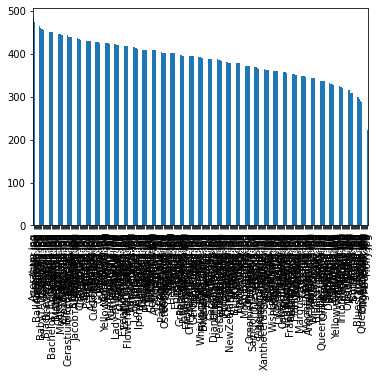

In [15]:
flowers_df['category'].value_counts().plot.bar()

Cornflower288.jpg


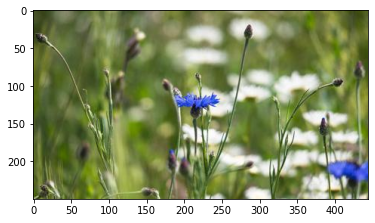

In [16]:
flower_path = './data/Flowers299/'
folder_sample = random.choice(train_dr)
train_dr2 = os.listdir(flower_path + folder_sample)
flower_sample = random.choice(train_dr2)
print(flower_sample)
image = load_img(flower_path + folder_sample + '/' + flower_sample)
plt.imshow(image)

In [17]:
import glob
merged_ds = glob.glob('./data/Flowers299/*')

In [18]:
merged_ds

['./data/Flowers299/Kniphofia',
 './data/Flowers299/ForgetMeNot',
 './data/Flowers299/Zinnia',
 './data/Flowers299/IcelandPoppy',
 './data/Flowers299/Pinks',
 './data/Flowers299/Alchemilla',
 './data/Flowers299/Lavatera',
 './data/Flowers299/Nemophila',
 './data/Flowers299/Linaria',
 './data/Flowers299/Penstemon',
 './data/Flowers299/Celosia',
 './data/Flowers299/Phlox',
 './data/Flowers299/FlannelFlower',
 './data/Flowers299/Clover',
 './data/Flowers299/Dahlia',
 './data/Flowers299/Magnolia',
 './data/Flowers299/Impatiens',
 './data/Flowers299/Clematis',
 './data/Flowers299/Mayflower',
 './data/Flowers299/BabyтАЩsBreath',
 './data/Flowers299/Lupin',
 './data/Flowers299/TeaRose',
 './data/Flowers299/Hosta',
 './data/Flowers299/PersianButtercup',
 './data/Flowers299/PaintedDaisy',
 './data/Flowers299/Bluebonnets',
 './data/Flowers299/ShastaDaisy',
 './data/Flowers299/Geranium',
 './data/Flowers299/Eremurus',
 './data/Flowers299/Heliotrope',
 './data/Flowers299/Photinia',
 './data/Flower

In [19]:
from keras.models import Sequential
from keras.layers import Conv2D, MaxPooling2D , Dropout , Flatten, Dense, Activation, BatchNormalization

model = Sequential()

model.add(Conv2D(32, (3, 3),activation='relu',input_shape=(img_width, img_height, image_channel)))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(64, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Conv2D(128, (3, 3), activation='relu'))
model.add(BatchNormalization())
model.add(MaxPooling2D(pool_size=(2, 2)))
model.add(Dropout(0.25))

model.add(Flatten())
model.add(Dense(512, activation='relu'))
model.add(BatchNormalization())
model.add(Dropout(0.5))
model.add(Dense(298, activation='softmax')) 

model.compile(loss='categorical_crossentropy', optimizer='rmsprop', metrics=['accuracy'])

model.summary()

2022-01-21 21:32:45.034516: I tensorflow/core/common_runtime/gpu/gpu_device.cc:1510] Created device /job:localhost/replica:0/task:0/device:GPU:0 with 30972 MB memory:  -> device: 0, name: Tesla V100S-PCIE-32GB, pci bus id: 0000:3b:00.0, compute capability: 7.0


Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 126, 126, 32)      896       
_________________________________________________________________
batch_normalization (BatchNo (None, 126, 126, 32)      128       
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 63, 63, 32)        0         
_________________________________________________________________
dropout (Dropout)            (None, 63, 63, 32)        0         
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 61, 61, 64)        18496     
_________________________________________________________________
batch_normalization_1 (Batch (None, 61, 61, 64)        256       
_________________________________________________________________
max_pooling2d_1 (MaxPooling2 (None, 30, 30, 64)        0

In [20]:
from keras.callbacks import EarlyStopping,ReduceLROnPlateau

earlystop = EarlyStopping(patience=10)
learning_rate_reduction = ReduceLROnPlateau(monitor='val_accuracy', 
                                            patience=2, 
                                            verbose=1, 
                                            factor=0.5, 
                                            min_lr=0.00001)

callbacks = [earlystop, learning_rate_reduction]

In [31]:
train_df, validate_df = train_test_split(flowers_df, test_size=0.20, random_state=42)
train_df = train_df.reset_index(drop=True)
validate_df = validate_df.reset_index(drop=True) 

print(train_df,validate_df)

total_train = train_df.shape[0]
total_validate = validate_df.shape[0]
batch_size=256

                           filename                    category
0                    Diascia398.jpg                 Diascia.jpg
1                   Foxglove120.jpg                Foxglove.jpg
2             BluestarFlower127.jpg          BluestarFlower.jpg
3      Xanthocerassorbifolium14.jpg  Xanthocerassorbifolium.jpg
4            QueenoftheMeadow99.jpg        QueenoftheMeadow.jpg
...                             ...                         ...
92571                Erigeron81.jpg                Erigeron.jpg
92572           WoollyViolet353.jpg            WoollyViolet.jpg
92573                  Roses273.jpg                   Roses.jpg
92574                 Zinnia162.jpg                  Zinnia.jpg
92575            Xerophyllum370.jpg             Xerophyllum.jpg

[92576 rows x 2 columns]                     filename             category
0          DesertRose325.jpg       DesertRose.jpg
1             Eustoma196.jpg          Eustoma.jpg
2          OxeyeDaisy217.jpg       OxeyeDaisy.jpg
3     

In [22]:
# import shutil

# for folder_name in os.listdir('./data/Flowers299'):
#   file_source = './data/Flowers299_data/' + folder_name + '/'
#   file_destination = './data/flowers_train_data'
#   get_files = os.listdir(file_source)
  
#   for g in get_files:
#     shutil.move(file_source + g, file_destination)

In [23]:
train_datagen = ImageDataGenerator(
    rotation_range=15,
    rescale=1./255,
    shear_range=0.1,
    zoom_range=0.2,
    horizontal_flip=True,
    width_shift_range=0.1,
    height_shift_range=0.1
)

train_generator = train_datagen.flow_from_dataframe(
    train_df, 
    './data/flowers_train_data', 
    x_col='filename',
    y_col='category',
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size
)

Found 92220 validated image filenames belonging to 298 classes.


In [24]:
validation_datagen = ImageDataGenerator(rescale=1./255)
validation_generator = validation_datagen.flow_from_dataframe(
    validate_df, 
    "./data/flowers_train_data", 
    x_col='filename',
    y_col='category',
    target_size=(img_width, img_height),
    class_mode='categorical',
    batch_size=batch_size
)

Found 23056 validated image filenames belonging to 298 classes.


### 훈련 결과

Found 1 validated image filenames belonging to 1 classes.


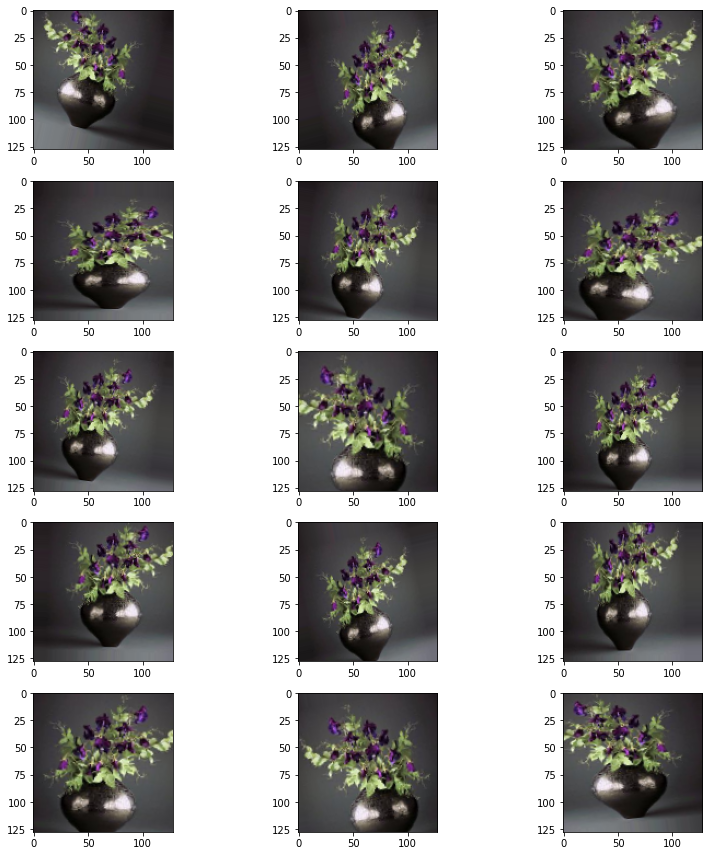

In [25]:
example_df = train_df.sample(n=1).reset_index(drop=True)
example_generator = train_datagen.flow_from_dataframe(
    example_df, 
    "./data/flowers_train_data", 
    x_col='filename',
    y_col='category',
    target_size=(img_width, img_height),
    class_mode='categorical'
)

plt.figure(figsize=(12, 12))
for i in range(0, 15):
    plt.subplot(5, 3, i+1)
    for X_batch, Y_batch in example_generator:
        image = X_batch[0]
        plt.imshow(image)
        break
plt.tight_layout()
plt.show()

### 훈련시작

In [34]:
epochs=3 if FAST_RUN else 50
history = model.fit_generator(
    train_generator, 
    validation_data=validation_generator,
    validation_steps=total_validate//batch_size,
    steps_per_epoch=total_train//batch_size,
    verbose=1,
    callbacks=callbacks
)

361/361 [==============================] - 25s 69ms/step - loss: 0.0633 - accuracy: 0.9976 - val_loss: 0.0246 - val_accuracy: 1.0000


In [ ]:
model.save('model-whole.h5')
model.save_weights('model-weights.h5')